두개 이상의 확률 변수가 서로 관계를 가지며 존재하는 경우를 생각해보자, 예를 들어 학교에 있는 학생의 키와 몸무게를 측정하는 경우, 한명의 학생 w에 대해 두개의 자료 (x,y)가 한 쌍으로 나오게 된다. 이렇게 취득한 자료를 확률변수 X와 Y로 볼때, 이를 묘사하기 위한 확률 분포를 **결합확률분포(Joint Probability Distribution)**이라고 한다. 

누적 결합확률 분포함수를 편미분하여서 결합 확률밀도함수를 정의할 수 있다. 

$$ f_{xy}= \frac{\partial^2F_{XY}(x,y)}{\partial{x}\partial{y}}$$

결합 밀도 합수의 특정 구간에 대해서 적분하면 해당 구간의 확률이 되고, 전체 구간의 합은 1이다. 
$$ \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f_{XY}(x,y)dxdy=1$$ 

해당 함수를 2/3차원 함수로 그려 보면 아래와 같다. 

In [57]:
import scipy.stats as st
import numpy as np 

mu=[0,0]
cov=[[2,-1],[-1,18]]
rv=st.multivariate_normal(mu,cov)
xx=np.linspace(-5,5,100)
yy=np.linspace(-5,5,100)
XX,YY=np.meshgrid(xx,yy)
data=np.dstack([XX,YY])
ZZ=rv.pdf(data) 

In [49]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
fig=plt.figure()
ax=Axes3D(fig)
ax.contour(XX, YY, ZZ)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Joint Probability Density")
ax.view_init(50, -80)
plt.show()

결합 확률 질량 함수는 모든 확률변수의 값이 특정숫자가 될 확률을 뜻하낟. 
$f_{XY}(x,y)=P(X=x,Y=y)$b

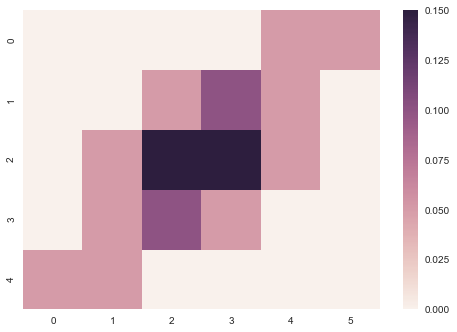

In [53]:
import seaborn as sns 
pmf = np.array([[0, 0, 0, 0, 1, 1],
                [0, 0, 1, 2, 1, 0],
                [0, 1, 3, 3, 1, 0],
                [0, 1, 2, 1, 0, 0],
                [1, 1, 0, 0, 0, 0]])
pmf=pmf/pmf.sum()
sns.heatmap(pmf)
plt.show()

## 주변 확률밀도 함수 
**주변 확률 밀도 함수(marginal probability density function)**은 다변 수 확률 밀도함수를 특정한 하나의 변수에 대해 평균한 값을 의히한다. 

$$ f_X(x)=\int f_{XY}(x,y)dy $$ 
$$ f_Y(y)=\int f_{XY}(x,y)dx $$ 

앞선 연속확률분포에서  

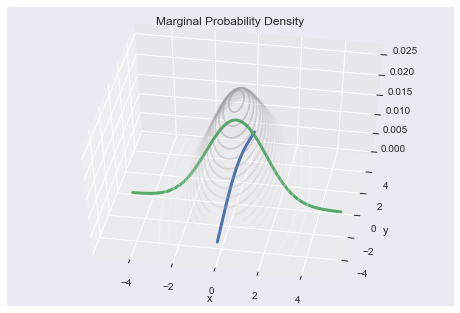

In [59]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.contour(XX, YY, ZZ, levels=np.linspace(0, 0.04, 30), alpha=0.3)
ax.plot(yy, ZZ.mean(axis=1), zdir='x', lw=3)
ax.plot(xx, ZZ.mean(axis=0), zdir='y', lw=3)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Marginal Probability Density")
ax.view_init(50, -80)
plt.show()

## 조건부 확률밀도함수 
특정값X가 나왔을때, 특정값Y가 나올 확률을 뜻한다. 

$$ f_{x|y}(x|y_{0})=\frac{f_{XY}(x,y={y_0})}{f_Y(y_0)} $$ 
$$ f_{y|x}(y|x_{0})=\frac{f_{XY}(y,x={x_0})}{f_x(x_0)} $$ 

In [67]:
pmf_marginal_x = pmf.sum(axis=0)
pmf_marginal_y = pmf.sum(axis=1)
cond_y0 = pmf[0, :]/pmf_marginal_y[0]
cond_y1 = pmf[1, :]/pmf_marginal_y[1]
pmf[0, :],pmf_marginal_y[0]

(array([ 0.  ,  0.  ,  0.  ,  0.  ,  0.05,  0.05]), 0.10000000000000001)